In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import make_blobs

In [7]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=20)
X.shape

(1000, 2)

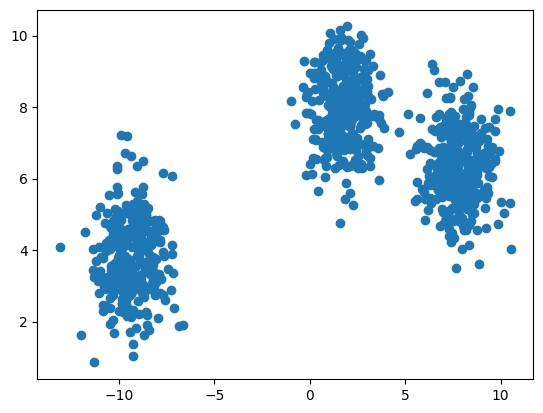

In [9]:
plt.scatter(X[:,0],X[:,1])

In [10]:
#elbow method
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train

array([[-9.6625225 ,  2.37069172],
       [ 6.5449167 ,  7.34538148],
       [ 0.2238943 ,  9.2513829 ],
       ...,
       [-8.78227605,  4.57426915],
       [ 1.87795756,  9.06509973],
       [ 8.35436593,  5.69259375]])

In [14]:
from  sklearn.cluster import KMeans

In [15]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[43733.557639163366,
 6839.160996488405,
 1596.183112368004,
 1401.338697551777,
 1219.2064818935987,
 1087.790477549875,
 918.7424634614435,
 830.3493026632759,
 764.6428494117672,
 740.0259131632712]

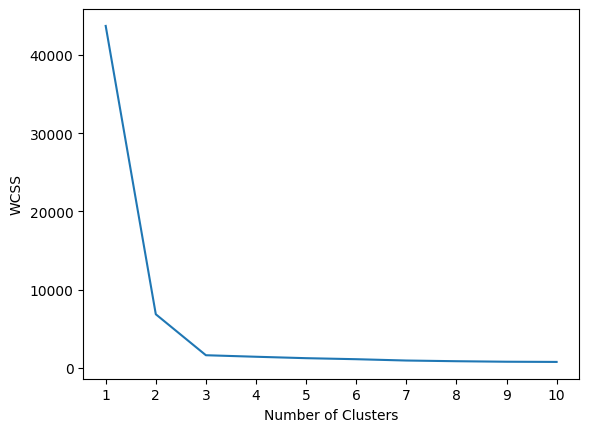

In [17]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_train_labels=kmeans.fit_predict(X_train)

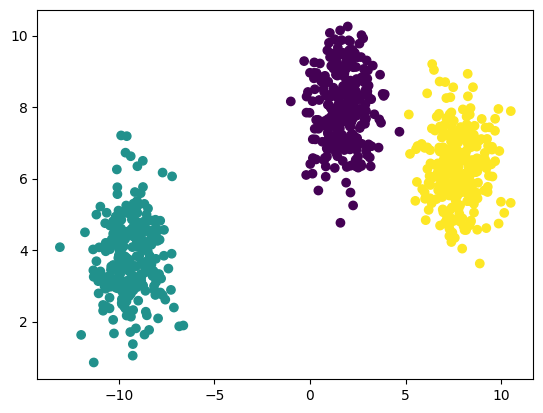

In [26]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train_labels)

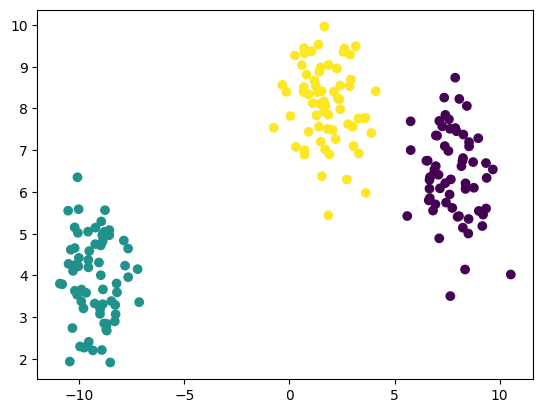

In [28]:
y_test_labels=kmeans.predict(X_test)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [37]:
from kneed import KneeLocator

In [40]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [41]:
#silhouetescore
from sklearn.metrics import silhouette_score

In [49]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit_predict(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

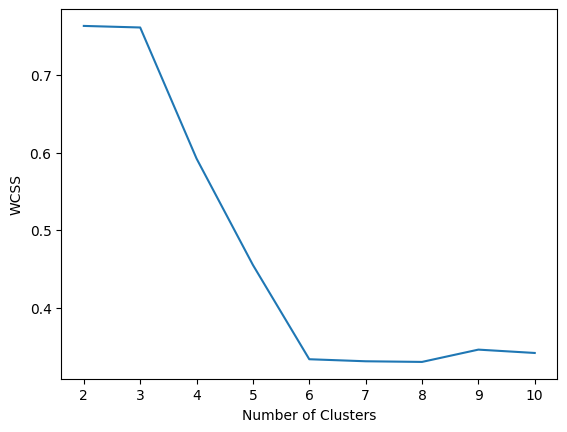

In [ ]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()